In [1]:
from math import sqrt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_actual = pd.read_csv("estudiantes_calculo_actualv2.csv",delimiter=',')
df_historico = pd.read_csv("estudiantes_calculo_historicov2.csv",delimiter=',')

In [3]:
df_actual.sample(10)

,EST_COD,ASP_SEXO,ASP_ESTRATO,ASP_FECHA_NAC,ASP_LUG_NAC,TIPO_COD,TIPOI,PUNTAJE_ICFES,EST_VALOR_MATRICULA,CRA_COD,...,PER,FACULTAD,TIPO_PROGRAMA,ASP_LOCALIDAD,ASP_DEP_NAC,ASP_SNP,ASP_TIPO_COLEGIO,ASP_LOCALIDAD_COLEGIO,ASP_TRABAJA,ANIO_ICFES
1063,20232574091,M,1.0,2001-09-21 00:00:00.000,11001.0,1,NORMAL,255.0,116000.0,574,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,7.0,11.0,AC202040086702,O,7.0,NO,2020
1933,20232015329,F,2.0,2003-11-10 00:00:00.000,11001.0,1,NORMAL,305.0,185600.0,15,...,3,FACULTAD DE INGENIERIA,1,8.0,11.0,AC202146522148,O,8.0,NO,2021
2276,20222574100,M,1.0,2001-07-04 00:00:00.000,25754.0,1,NORMAL,270.0,116000.0,574,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,26.0,25.0,AC201910703439,P,26.0,SI,2019
596,20231578105,F,2.0,2006-02-13 00:00:00.000,11001.0,1,NORMAL,312.0,951200.0,578,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,4.0,11.0,AC202242936193,P,4.0,NO,2022
19,20222578101,M,1.0,2003-07-15 00:00:00.000,11001.0,1,NORMAL,287.0,116000.0,578,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,19.0,11.0,AC202040317206,O,19.0,NO,2020
2787,20232673073,M,2.0,2001-11-10 00:00:00.000,25175.0,1,NORMAL,277.0,185600.0,673,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,25.0,25.0,AC202042054781,O,25.0,NO,2020
2548,20232001128,M,2.0,2001-09-28 00:00:00.000,52250.0,1,NORMAL,185.0,420000.0,1,...,3,FACULTAD DEL MEDIO AMBIENTE Y RECURSOS NATURALES,13,7.0,52.0,AC202210445247,P,8.0,NO,2022
2201,20232020111,M,3.0,2002-03-20 00:00:00.000,73268.0,1,NORMAL,352.0,2394240.0,20,...,3,FACULTAD DE INGENIERIA,1,14.0,73.0,AC202244592242,O,6.0,NO,2022
2815,20232010051,M,2.0,2006-07-02 00:00:00.000,11001.0,1,NORMAL,317.0,185600.0,10,...,3,FACULTAD DEL MEDIO AMBIENTE Y RECURSOS NATURALES,1,9.0,11.0,AC202245095237,O,25.0,NO,2022
2961,20232578028,M,2.0,2003-09-18 00:00:00.000,11001.0,1,NORMAL,327.0,185600.0,578,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,19.0,11.0,AC202143645868,O,3.0,NO,2021


In [4]:
df_historico.sample(10)

,EST_COD,ASP_SEXO,ASP_ESTRATO,ASP_FECHA_NAC,ASP_LUG_NAC,TIPO_COD,TIPOI,PUNTAJE_ICFES,EST_VALOR_MATRICULA,CRA_COD,...,PER,FACULTAD,TIPO_PROGRAMA,ASP_LOCALIDAD,ASP_DEP_NAC,ASP_SNP,ASP_TIPO_COLEGIO,ASP_LOCALIDAD_COLEGIO,ASP_TRABAJA,ANIO_ICFES
37365,20151007044,M,1.0,1995-03-24 00:00:00.000,25843.0,1,NORMAL,334.0,115999.0,7,...,3,FACULTAD DE INGENIERIA,1,25.0,25.0,AC201425092226,O,25.0,NO,2014
5135,20192005147,M,1.0,2001-06-05 00:00:00.000,15332.0,1,NORMAL,320.0,116001.0,5,...,3,FACULTAD DE INGENIERIA,1,25.0,15.0,AC201822869782,O,25.0,NO,2018
49399,20221673030,M,2.0,2004-12-31 00:00:00.000,11001.0,1,NORMAL,311.0,1205311.0,673,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,19.0,11.0,AC202140515312,P,19.0,NO,2021
36408,20141020066,M,2.0,1996-10-31 00:00:00.000,11279.0,1,NORMAL,404.0,185606.0,20,...,1,FACULTAD DE INGENIERIA,1,9.0,11.0,AC201320865253,O,9.0,NO,2013
12343,20192578114,M,2.0,2002-11-09 00:00:00.000,11102.0,1,NORMAL,301.0,175095.0,578,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,7.0,11.0,AC201825243746,O,7.0,NO,2018
27300,20211578002,M,2.0,2004-03-23 00:00:00.000,11001.0,1,NORMAL,351.0,1184064.0,578,...,1,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,5.0,11.0,AC202041906841,P,5.0,NO,2020
24913,20172020055,M,3.0,1996-11-19 00:00:00.000,11001.0,1,NORMAL,337.0,860735.0,20,...,3,FACULTAD DE INGENIERIA,1,14.0,11.0,AC201710366591,O,12.0,NO,2017
14426,20121072104,M,2.0,1992-11-30 00:00:00.000,11001.0,1,NORMAL,340.0,185588.0,72,...,3,FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLO...,3,19.0,11.0,AC201125615778,O,16.0,NO,2011
39622,20181025047,F,2.0,2000-09-29 00:00:00.000,25754.0,1,NORMAL,329.0,660426.0,25,...,1,FACULTAD DE INGENIERIA,1,26.0,25.0,AC201726044184,P,26.0,NO,2017
50208,20131031055,M,2.0,1995-07-16 00:00:00.000,25754.0,1,NORMAL,365.0,185602.0,31,...,1,FACULTAD DEL MEDIO AMBIENTE Y RECURSOS NATURALES,3,26.0,25.0,AC201227683402,O,8.0,NO,2012


In [5]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EST_COD                3008 non-null   int64  
 1   ASP_SEXO               3008 non-null   object 
 2   ASP_ESTRATO            3006 non-null   float64
 3   ASP_FECHA_NAC          3008 non-null   object 
 4   ASP_LUG_NAC            3000 non-null   float64
 5   TIPO_COD               3008 non-null   int64  
 6   TIPOI                  3008 non-null   object 
 7   PUNTAJE_ICFES          3005 non-null   float64
 8   EST_VALOR_MATRICULA    3005 non-null   float64
 9   CRA_COD                3008 non-null   int64  
 10  CARRERA                3008 non-null   object 
 11  ASI_COD                3008 non-null   int64  
 12  NOTA                   3008 non-null   int64  
 13  ANO                    3008 non-null   int64  
 14  PER                    3008 non-null   int64  
 15  FACU

In [6]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56982 entries, 0 to 56981
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EST_COD                56982 non-null  int64  
 1   ASP_SEXO               56982 non-null  object 
 2   ASP_ESTRATO            56976 non-null  float64
 3   ASP_FECHA_NAC          56982 non-null  object 
 4   ASP_LUG_NAC            56858 non-null  float64
 5   TIPO_COD               56982 non-null  int64  
 6   TIPOI                  56982 non-null  object 
 7   PUNTAJE_ICFES          56818 non-null  float64
 8   EST_VALOR_MATRICULA    56146 non-null  float64
 9   CRA_COD                56982 non-null  int64  
 10  CARRERA                56982 non-null  object 
 11  ASI_COD                56982 non-null  int64  
 12  NOTA                   56982 non-null  int64  
 13  ANO                    56982 non-null  int64  
 14  PER                    56982 non-null  int64  
 15  FA

In [7]:
df_historico.NOTA.value_counts()#la mayoria de estudiantes pasan con 3!!!!

30    6604
0     3523
31    3015
32    2342
33    2092
34    1915
35    1809
36    1718
25    1467
37    1464
38    1256
24    1214
20    1190
26    1170
22    1169
23    1150
21    1137
39    1120
40    1092
18    1017
19     945
27     940
15     926
14     882
16     880
17     866
10     831
41     830
12     821
28     781
42     767
13     766
11     759
7      732
4      719
9      711
8      697
6      648
43     608
2      594
5      593
3      538
1      509
44     507
45     398
46     296
29     275
47     250
48     171
49     139
50     139
Name: NOTA, dtype: int64

In [8]:
df_actual.NOTA.value_counts()#la nota parcial predominante es 0 debido a que los estudiantes desertan o nunca ocuparon el cupo 

0     267
30    184
25    128
24    108
22    101
26     89
23     88
31     88
19     86
21     84
32     84
20     84
27     81
18     75
15     70
34     68
17     68
9      67
7      67
11     63
28     63
8      62
16     61
35     61
13     56
10     55
33     54
5      52
36     51
38     51
29     47
4      46
37     46
14     45
12     45
6      42
2      36
39     29
3      28
41     27
40     26
1      24
42     22
44     10
43      9
45      6
46      3
49      1
Name: NOTA, dtype: int64

In [9]:
df_actual.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
3003    False
3004    False
3005    False
3006    False
3007    False
Length: 3008, dtype: bool

In [10]:
df_historico.isnull().sum()

EST_COD                     0
ASP_SEXO                    0
ASP_ESTRATO                 6
ASP_FECHA_NAC               0
ASP_LUG_NAC               124
TIPO_COD                    0
TIPOI                       0
PUNTAJE_ICFES             164
EST_VALOR_MATRICULA       836
CRA_COD                     0
CARRERA                     0
ASI_COD                     0
NOTA                        0
ANO                         0
PER                         0
FACULTAD                    0
TIPO_PROGRAMA               0
ASP_LOCALIDAD              14
ASP_DEP_NAC               124
ASP_SNP                     0
ASP_TIPO_COLEGIO         1275
ASP_LOCALIDAD_COLEGIO      51
ASP_TRABAJA                 0
ANIO_ICFES                  0
dtype: int64

In [11]:
df_actual.isnull().sum()

EST_COD                  0
ASP_SEXO                 0
ASP_ESTRATO              2
ASP_FECHA_NAC            0
ASP_LUG_NAC              8
TIPO_COD                 0
TIPOI                    0
PUNTAJE_ICFES            3
EST_VALOR_MATRICULA      3
CRA_COD                  0
CARRERA                  0
ASI_COD                  0
NOTA                     0
ANO                      0
PER                      0
FACULTAD                 0
TIPO_PROGRAMA            0
ASP_LOCALIDAD            4
ASP_DEP_NAC              8
ASP_SNP                  0
ASP_TIPO_COLEGIO         9
ASP_LOCALIDAD_COLEGIO    7
ASP_TRABAJA              0
ANIO_ICFES               0
dtype: int64

### imputamos valores donde sea razonable 

In [12]:
min_range = 1
max_range = 5

# Replace values out of range with NaN
df_actual.loc[~df_actual['ASP_ESTRATO'].between(min_range, max_range), 'ASP_ESTRATO'] = np.nan

df_actual['ASP_ESTRATO'].fillna(df_actual['ASP_ESTRATO'].mode().iloc[0], inplace=True)
df_actual['EST_VALOR_MATRICULA'].fillna(df_actual['EST_VALOR_MATRICULA'].mode().iloc[0], inplace=True)
df_actual['NOTA'].fillna(df_actual['NOTA'].mean(), inplace=True)
df_actual['ASP_LUG_NAC'].fillna(df_actual['ASP_LUG_NAC'].mode().iloc[0], inplace=True)
df_actual['PUNTAJE_ICFES'].fillna(df_actual['PUNTAJE_ICFES'].mean(), inplace=True)
df_actual['EST_VALOR_MATRICULA'].fillna(df_actual['EST_VALOR_MATRICULA'].mode().iloc[0], inplace=True)
df_actual['ASP_LOCALIDAD'].fillna(df_actual['ASP_LOCALIDAD'].mode().iloc[0], inplace=True)
df_actual['ASP_DEP_NAC'].fillna(df_actual['ASP_DEP_NAC'].mode().iloc[0], inplace=True)
df_actual['ASP_TIPO_COLEGIO'].fillna(df_actual['ASP_TIPO_COLEGIO'].mode().iloc[0], inplace=True)
df_actual['ASP_LOCALIDAD_COLEGIO'].fillna(df_actual['ASP_LOCALIDAD_COLEGIO'].mode().iloc[0], inplace=True)

In [13]:
min_range = 1
max_range = 6

# Replace values out of range with NaN
df_historico.loc[~df_historico['ASP_ESTRATO'].between(min_range, max_range), 'ASP_ESTRATO'] = np.nan

df_historico['ASP_ESTRATO'].fillna(df_historico['ASP_ESTRATO'].mode().iloc[0], inplace=True)
df_historico['EST_VALOR_MATRICULA'].fillna(df_historico['EST_VALOR_MATRICULA'].mode().iloc[0], inplace=True)
df_historico['NOTA'].fillna(df_historico['NOTA'].mean(), inplace=True)
df_historico['ASP_LUG_NAC'].fillna(df_historico['ASP_LUG_NAC'].mode().iloc[0], inplace=True)
df_historico['PUNTAJE_ICFES'].fillna(df_historico['PUNTAJE_ICFES'].mean(), inplace=True)
df_historico['EST_VALOR_MATRICULA'].fillna(df_historico['EST_VALOR_MATRICULA'].mode().iloc[0], inplace=True)
df_historico['ASP_LOCALIDAD'].fillna(df_historico['ASP_LOCALIDAD'].mode().iloc[0], inplace=True)
df_historico['ASP_DEP_NAC'].fillna(df_historico['ASP_DEP_NAC'].mode().iloc[0], inplace=True)
df_historico['ASP_TIPO_COLEGIO'].fillna(df_historico['ASP_TIPO_COLEGIO'].mode().iloc[0], inplace=True)
df_historico['ASP_LOCALIDAD_COLEGIO'].fillna(df_historico['ASP_LOCALIDAD_COLEGIO'].mode().iloc[0], inplace=True)

In [14]:
df_actual['ASP_FECHA_NAC'] = pd.to_datetime(df_actual['ASP_FECHA_NAC'])
df_historico['ASP_FECHA_NAC'] = pd.to_datetime(df_historico['ASP_FECHA_NAC'])

In [15]:
df_actual['EDAD'] = df_actual['ANO'] - df_actual['ASP_FECHA_NAC'].dt.year 
df_historico['EDAD'] = df_historico['ANO'] - df_historico['ASP_FECHA_NAC'].dt.year 

In [16]:
df_actual['APRUEBA'] = np.where(df_actual['NOTA'] < 30, 0, 1)
df_historico['APRUEBA'] = np.where(df_historico['NOTA'] < 30, 0, 1)

In [18]:
df_historico['APRUEBA'].value_counts()#ya de aqui yace un problema

1    28532
0    28450
Name: APRUEBA, dtype: int64

In [19]:
df_historico.isnull().sum()

EST_COD                  0
ASP_SEXO                 0
ASP_ESTRATO              0
ASP_FECHA_NAC            0
ASP_LUG_NAC              0
TIPO_COD                 0
TIPOI                    0
PUNTAJE_ICFES            0
EST_VALOR_MATRICULA      0
CRA_COD                  0
CARRERA                  0
ASI_COD                  0
NOTA                     0
ANO                      0
PER                      0
FACULTAD                 0
TIPO_PROGRAMA            0
ASP_LOCALIDAD            0
ASP_DEP_NAC              0
ASP_SNP                  0
ASP_TIPO_COLEGIO         0
ASP_LOCALIDAD_COLEGIO    0
ASP_TRABAJA              0
ANIO_ICFES               0
EDAD                     0
APRUEBA                  0
dtype: int64

In [20]:
df_actual.isnull().sum()

EST_COD                  0
ASP_SEXO                 0
ASP_ESTRATO              0
ASP_FECHA_NAC            0
ASP_LUG_NAC              0
TIPO_COD                 0
TIPOI                    0
PUNTAJE_ICFES            0
EST_VALOR_MATRICULA      0
CRA_COD                  0
CARRERA                  0
ASI_COD                  0
NOTA                     0
ANO                      0
PER                      0
FACULTAD                 0
TIPO_PROGRAMA            0
ASP_LOCALIDAD            0
ASP_DEP_NAC              0
ASP_SNP                  0
ASP_TIPO_COLEGIO         0
ASP_LOCALIDAD_COLEGIO    0
ASP_TRABAJA              0
ANIO_ICFES               0
EDAD                     0
APRUEBA                  0
dtype: int64

In [21]:
df_historico.shape

(56982, 26)

In [22]:
df_actual.shape

(3008, 26)

In [23]:
df_historico.describe()

,EST_COD,ASP_ESTRATO,ASP_LUG_NAC,TIPO_COD,PUNTAJE_ICFES,EST_VALOR_MATRICULA,CRA_COD,ASI_COD,NOTA,ANO,PER,TIPO_PROGRAMA,ASP_LOCALIDAD,ASP_DEP_NAC,ASP_LOCALIDAD_COLEGIO,ANIO_ICFES,EDAD,APRUEBA
count,5.698200e+04,56982.000000,56982.000000,56982.000000,56982.000000,5.698200e+04,56982.000000,5.698200e+04,56982.000000,56982.000000,56982.000000,56982.000000,56982.000000,56982.000000,56982.000000,56982.000000,56982.000000,56982.000000
mean,2.017407e+10,2.123302,16472.637658,2.246534,339.517106,5.116292e+05,206.607911,2.212006e+04,24.643624,2017.615914,1.959636,3.125057,12.895985,15.524868,13.479186,2015.761381,19.325980,0.500720
std,3.075256e+07,0.661975,15774.839343,5.210776,47.756451,5.556146e+05,245.569839,8.237310e+05,12.556079,3.016384,0.996045,3.483856,8.176274,13.272178,9.059089,3.248311,2.529245,0.500004
min,2.000108e+10,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,1.000000e+00,0.000000,2013.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1999.000000,9.000000,0.000000
25%,2.015103e+10,2.000000,11001.000000,1.000000,310.000000,1.739910e+05,15.000000,1.000000e+00,15.000000,2015.000000,1.000000,1.000000,7.000000,11.000000,7.000000,2013.000000,18.000000,0.000000
50%,2.017201e+10,2.000000,11001.000000,1.000000,335.200000,1.856020e+05,78.000000,1.000000e+00,30.000000,2017.000000,1.000000,3.000000,10.000000,11.000000,10.000000,2016.000000,19.000000,1.000000
75%,2.020103e+10,3.000000,11102.000000,1.000000,367.000000,8.607320e+05,379.000000,1.000000e+00,34.000000,2020.000000,3.000000,3.000000,19.000000,11.000000,19.000000,2018.000000,20.000000,1.000000
max,2.023173e+10,6.000000,99999.000000,32.000000,614.000000,1.531200e+07,979.000000,3.780104e+07,50.000000,2023.000000,3.000000,19.000000,99.000000,99.000000,99.000000,2022.000000,65.000000,1.000000


In [24]:
df_actual.describe()

,EST_COD,ASP_ESTRATO,ASP_LUG_NAC,TIPO_COD,PUNTAJE_ICFES,EST_VALOR_MATRICULA,CRA_COD,ASI_COD,NOTA,ANO,PER,TIPO_PROGRAMA,ASP_LOCALIDAD,ASP_DEP_NAC,ASP_LOCALIDAD_COLEGIO,ANIO_ICFES,EDAD,APRUEBA
count,3.008000e+03,3008.00000,3008.000000,3008.000000,3008.000000,3.008000e+03,3008.000000,3008.000000,3008.000000,3008.0,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000
mean,2.022957e+10,2.11004,16103.137301,2.861702,309.301468,6.797204e+05,214.994016,859.304521,20.275266,2023.0,2.970412,3.181516,13.189162,15.461769,14.011968,2020.913896,19.646941,0.272606
std,5.253728e+06,0.67414,14608.900182,6.955617,36.570277,6.408247e+05,254.766347,4536.987108,11.798808,0.0,0.169475,4.004026,7.554290,12.720677,7.815114,2.201120,3.075540,0.445374
min,2.019138e+10,1.00000,0.000000,1.000000,152.000000,1.160000e+05,1.000000,1.000000,0.000000,2023.0,2.000000,1.000000,1.000000,0.000000,1.000000,1999.000000,15.000000,0.000000
25%,2.023102e+10,2.00000,11001.000000,1.000000,288.000000,1.856000e+05,15.000000,1.000000,11.000000,2023.0,3.000000,1.000000,7.000000,11.000000,7.000000,2020.000000,18.000000,0.000000
50%,2.023200e+10,2.00000,11001.000000,1.000000,313.000000,4.674000e+05,32.000000,1.000000,22.000000,2023.0,3.000000,1.000000,10.000000,11.000000,11.000000,2022.000000,19.000000,0.000000
75%,2.023203e+10,3.00000,11850.000000,1.000000,334.000000,1.015250e+06,572.000000,1.000000,30.000000,2023.0,3.000000,3.000000,19.000000,11.000000,25.000000,2022.000000,21.000000,1.000000
max,2.023278e+10,5.00000,99999.000000,32.000000,477.000000,5.357072e+06,979.000000,25207.000000,49.000000,2023.0,3.000000,19.000000,26.000000,95.000000,26.000000,2023.000000,46.000000,1.000000


In [25]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56982 entries, 0 to 56981
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EST_COD                56982 non-null  int64         
 1   ASP_SEXO               56982 non-null  object        
 2   ASP_ESTRATO            56982 non-null  float64       
 3   ASP_FECHA_NAC          56982 non-null  datetime64[ns]
 4   ASP_LUG_NAC            56982 non-null  float64       
 5   TIPO_COD               56982 non-null  int64         
 6   TIPOI                  56982 non-null  object        
 7   PUNTAJE_ICFES          56982 non-null  float64       
 8   EST_VALOR_MATRICULA    56982 non-null  float64       
 9   CRA_COD                56982 non-null  int64         
 10  CARRERA                56982 non-null  object        
 11  ASI_COD                56982 non-null  int64         
 12  NOTA                   56982 non-null  int64         
 13  A

In [26]:
 df_historico.nunique()

EST_COD                  37836
ASP_SEXO                     2
ASP_ESTRATO                  6
ASP_FECHA_NAC             6121
ASP_LUG_NAC                670
TIPO_COD                    12
TIPOI                       12
PUNTAJE_ICFES             1521
EST_VALOR_MATRICULA       5065
CRA_COD                     68
CARRERA                     24
ASI_COD                     16
NOTA                        51
ANO                         11
PER                          3
FACULTAD                     5
TIPO_PROGRAMA                5
ASP_LOCALIDAD               23
ASP_DEP_NAC                 35
ASP_SNP                  36610
ASP_TIPO_COLEGIO             2
ASP_LOCALIDAD_COLEGIO       24
ASP_TRABAJA                  2
ANIO_ICFES                  24
EDAD                        43
APRUEBA                      2
dtype: int64

In [27]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EST_COD                3008 non-null   int64         
 1   ASP_SEXO               3008 non-null   object        
 2   ASP_ESTRATO            3008 non-null   float64       
 3   ASP_FECHA_NAC          3008 non-null   datetime64[ns]
 4   ASP_LUG_NAC            3008 non-null   float64       
 5   TIPO_COD               3008 non-null   int64         
 6   TIPOI                  3008 non-null   object        
 7   PUNTAJE_ICFES          3008 non-null   float64       
 8   EST_VALOR_MATRICULA    3008 non-null   float64       
 9   CRA_COD                3008 non-null   int64         
 10  CARRERA                3008 non-null   object        
 11  ASI_COD                3008 non-null   int64         
 12  NOTA                   3008 non-null   int64         
 13  ANO

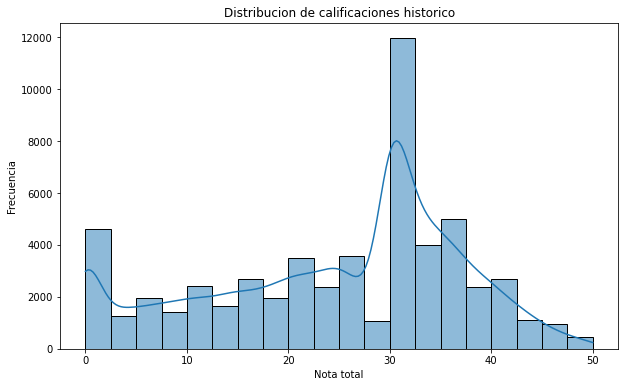

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_historico, x='NOTA', bins=20, kde=True)
plt.title('Distribucion de calificaciones historico')
plt.xlabel('Nota total')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
df_historico.CARRERA.value_counts()

INGENIERIA DE SISTEMAS                                           4431
TECNOLOGIA EN SISTEMATIZACION DE DATOS (CICLOS PROPEDEUTICOS)    4390
INGENIERIA INDUSTRIAL                                            4269
INGENIERIA CATASTRAL Y GEODESIA                                  4218
INGENIERIA ELECTRONICA                                           4050
TECNOLOGIA EN ELECTRONICA (CICLOS PROPEDEUTICOS)                 4010
TECNOLOGIA EN GESTION DE LA PRODUCCION INDUSTRIAL                3701
TECNOLOGIA EN MECANICA (CICLOS PROPEDEUTICOS)                    3656
INGENIERIA ELECTRICA                                             3123
INGENIERIA AMBIENTAL                                             2188
ADMINISTRACION AMBIENTAL                                         1884
INGENIERIA TOPOGRAFICA                                           1860
TECNOLOGÍA EN ELECTRICIDAD DE MEDIA Y BAJA TENSIÓN               1831
TECNOLOGIA EN CONSTRUCCIONES CIVILES (CICLOS PROPEDEUTICOS)      1801
TECNOLOGÍA EN GESTIÓ

In [30]:
#df_historico["CARRERA"] = np.random.choice([388, 403, 158, 136, 223, 142, 447, 218, 368, 386, 253, 415, 149, 369, 152, 148, 107, 441, 274, 444, 464, 340, 262, 301, 292], size=len(df_historico))
#df_historico["FACULTAD"] = np.random.choice([50, 70, 30, 90, 80], size=len(df_historico))

### Se codifican caracteristicas

In [31]:
# codificador de categorias
label_encoder = preprocessing.LabelEncoder() 
le = LabelEncoder()

df_historico["ASP_SEXO"] = le.fit_transform(df_historico["ASP_SEXO"])
df_historico["ASP_TIPO_COLEGIO"] = le.fit_transform(df_historico["ASP_TIPO_COLEGIO"])
df_historico["ASP_TRABAJA"] = le.fit_transform(df_historico["ASP_TRABAJA"])
df_historico["CARRERA"] = le.fit_transform(df_historico["CARRERA"])
df_historico["FACULTAD"] = le.fit_transform(df_historico["FACULTAD"])

df_actual["ASP_SEXO"] = le.fit_transform(df_actual["ASP_SEXO"])
df_actual["ASP_TIPO_COLEGIO"] = le.fit_transform(df_actual["ASP_TIPO_COLEGIO"])
df_actual["ASP_TRABAJA"] = le.fit_transform(df_actual["ASP_TRABAJA"])
df_actual["CARRERA"] = le.fit_transform(df_actual["CARRERA"])
df_historico["FACULTAD"] = le.fit_transform(df_historico["FACULTAD"])

In [32]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56982 entries, 0 to 56981
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EST_COD                56982 non-null  int64         
 1   ASP_SEXO               56982 non-null  int64         
 2   ASP_ESTRATO            56982 non-null  float64       
 3   ASP_FECHA_NAC          56982 non-null  datetime64[ns]
 4   ASP_LUG_NAC            56982 non-null  float64       
 5   TIPO_COD               56982 non-null  int64         
 6   TIPOI                  56982 non-null  object        
 7   PUNTAJE_ICFES          56982 non-null  float64       
 8   EST_VALOR_MATRICULA    56982 non-null  float64       
 9   CRA_COD                56982 non-null  int64         
 10  CARRERA                56982 non-null  int64         
 11  ASI_COD                56982 non-null  int64         
 12  NOTA                   56982 non-null  int64         
 13  A

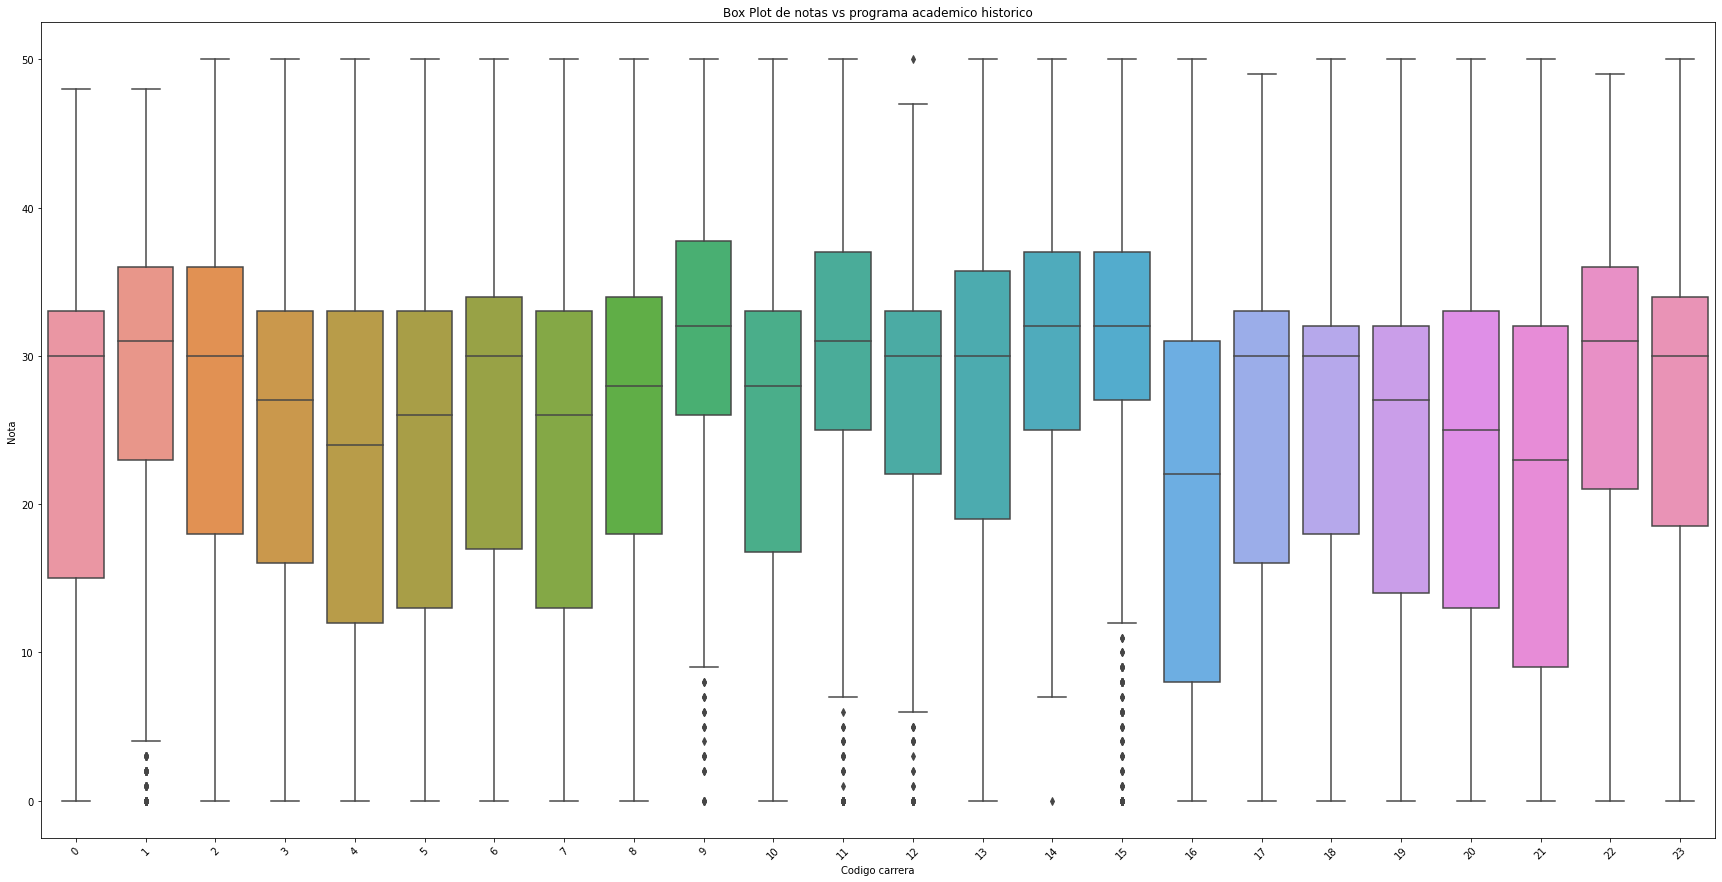

In [33]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df_historico, x='CARRERA', y='NOTA')
plt.xticks(rotation=45)
plt.title('Box Plot de notas vs programa academico historico')
plt.xlabel('Codigo carrera')
plt.ylabel('Nota')
plt.show()

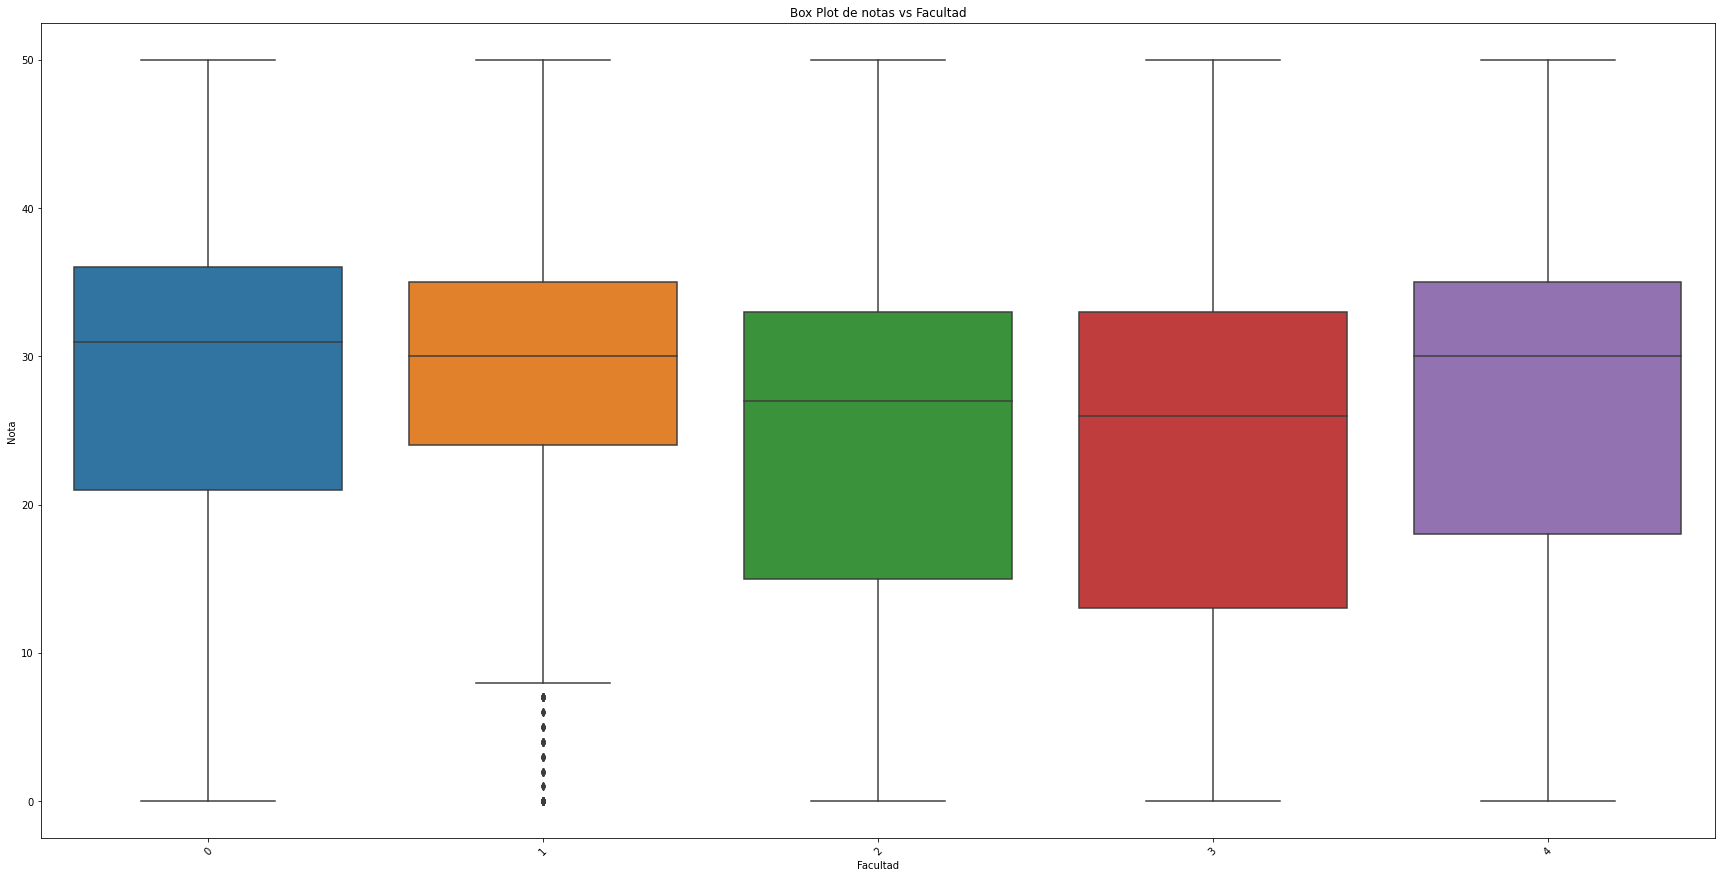

In [34]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df_historico, x='FACULTAD', y='NOTA')
plt.xticks(rotation=45)
plt.title('Box Plot de notas vs Facultad')
plt.xlabel('Facultad')
plt.ylabel('Nota')
plt.show()

In [35]:
df_historico['fecha_registro'] = pd.to_datetime(df_historico['ANO'].astype(str) + '-' + (df_historico['PER'] * 3).astype(str) + '-01')
#df_historico["ANO"] = le.fit_transform(df_historico["ANO"])
#df_actual["ANO"] = le.fit_transform(df_actual["ANO"]) 

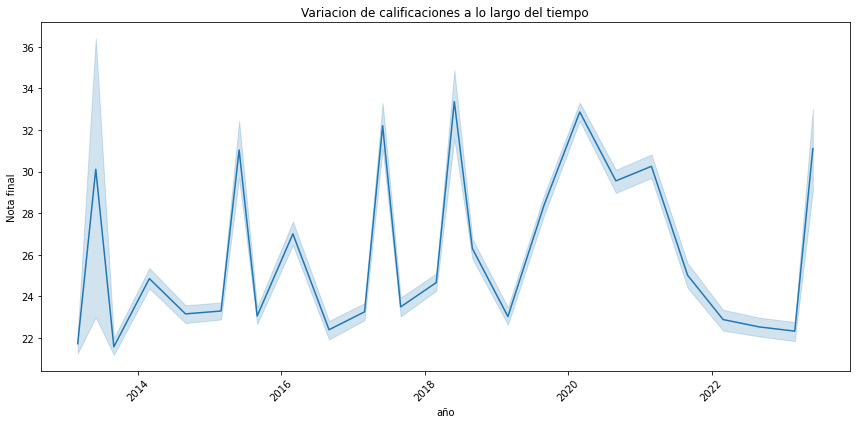

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_historico, x='fecha_registro', y='NOTA')
plt.title('Variacion de calificaciones a lo largo del tiempo')
plt.xlabel('año')
plt.ylabel('Nota final')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='ASP_TIPO_COLEGIO', ylabel='count'>

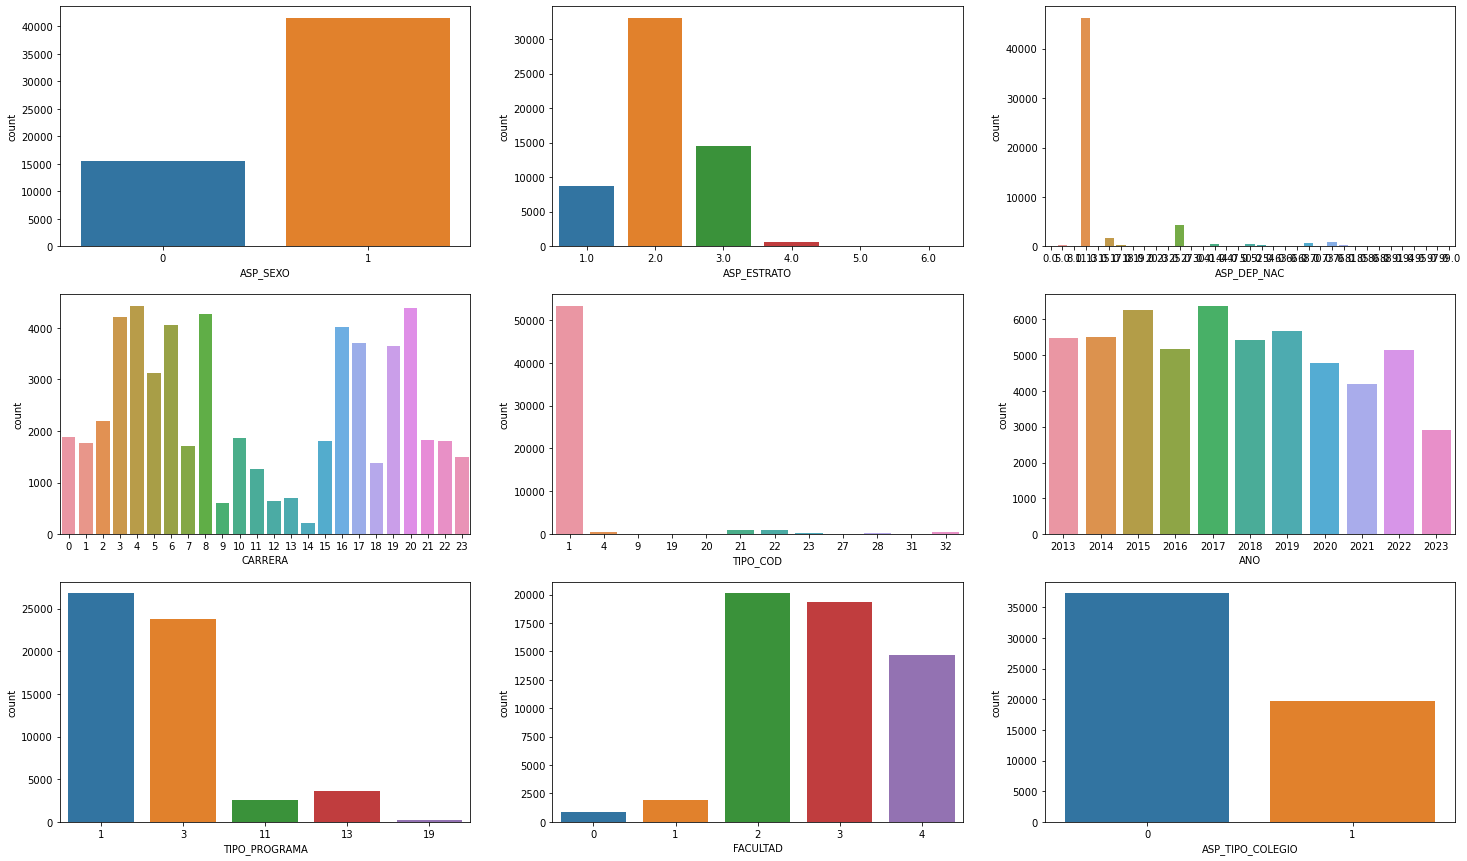

In [37]:
fig,axis = plt.subplots(nrows=3 ,ncols=3,figsize=(25,15))

sns.countplot(df_historico["ASP_SEXO"],ax=axis[0,0])
sns.countplot(df_historico["ASP_ESTRATO"],ax=axis[0,1])
sns.countplot(df_historico["ASP_DEP_NAC"],ax=axis[0,2])

sns.countplot(df_historico["TIPO_COD"],ax=axis[1,1])
sns.countplot(df_historico["CARRERA"],ax=axis[1,0])
sns.countplot(df_historico["ANO"],ax=axis[1,2])

sns.countplot(df_historico["FACULTAD"],ax=axis[2,1])
sns.countplot(df_historico["TIPO_PROGRAMA"],ax=axis[2,0])
sns.countplot(df_historico["ASP_TIPO_COLEGIO"],ax=axis[2,2])

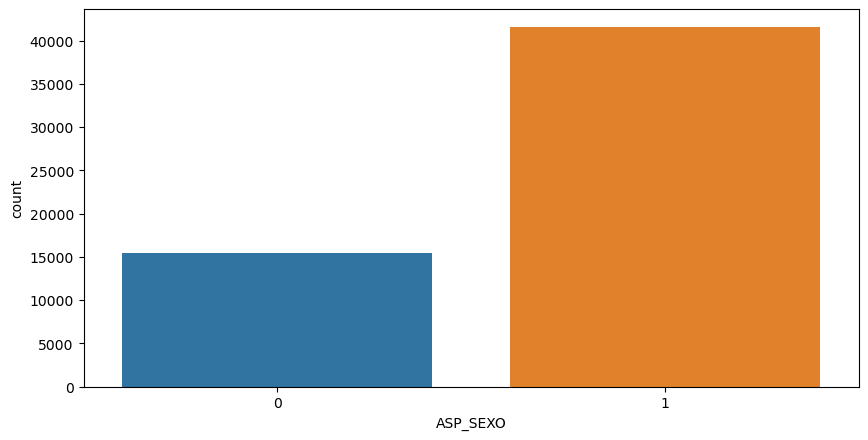

In [38]:
fig = plt.figure(figsize=(10, 5), dpi=100)

sns.countplot(df_historico["ASP_SEXO"])
plt.show()

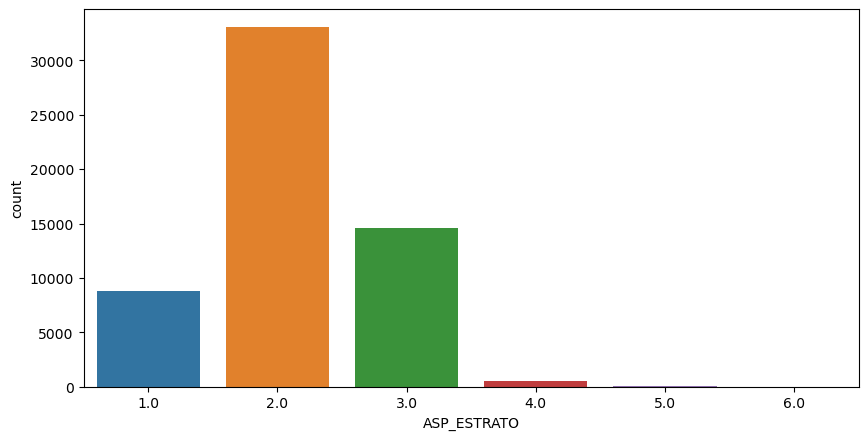

In [39]:
fig = plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(df_historico["ASP_ESTRATO"])
plt.show()

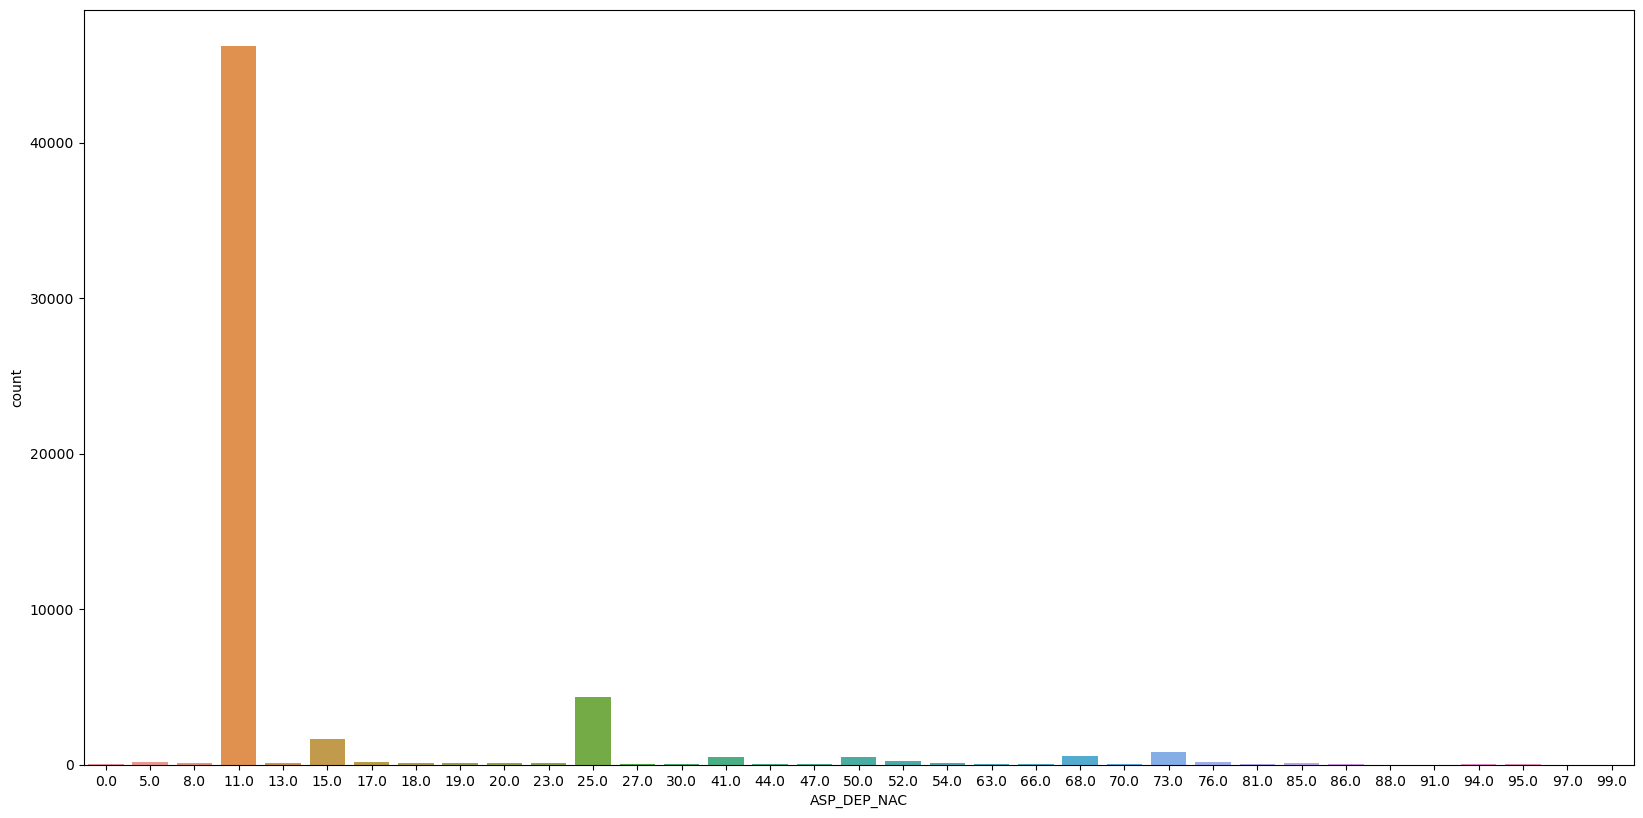

In [40]:
fig = plt.figure(figsize=(20, 10), dpi=100)
sns.countplot(df_historico["ASP_DEP_NAC"])
plt.show()

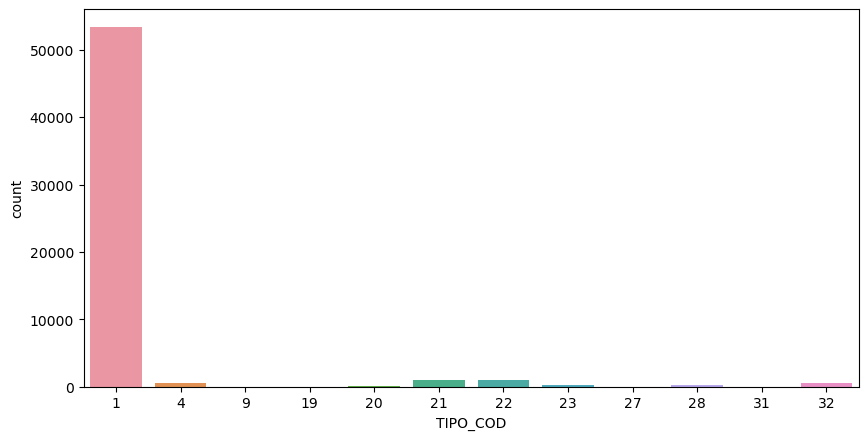

In [41]:
fig = plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(df_historico["TIPO_COD"])
plt.show()

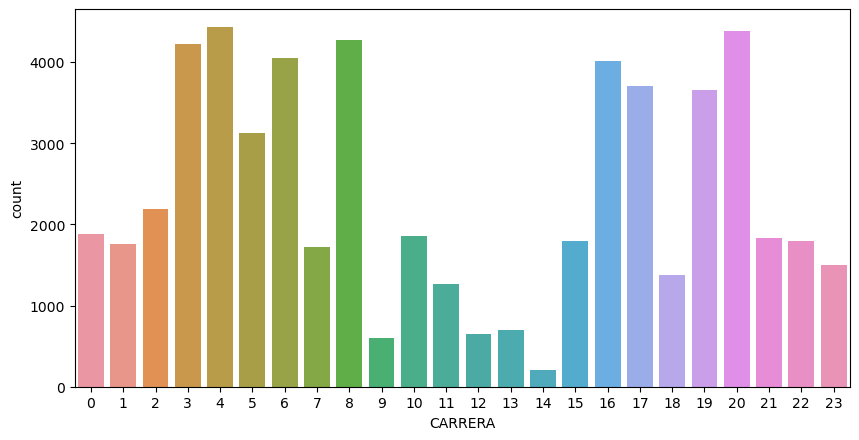

In [42]:
fig = plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(df_historico["CARRERA"])
plt.show()

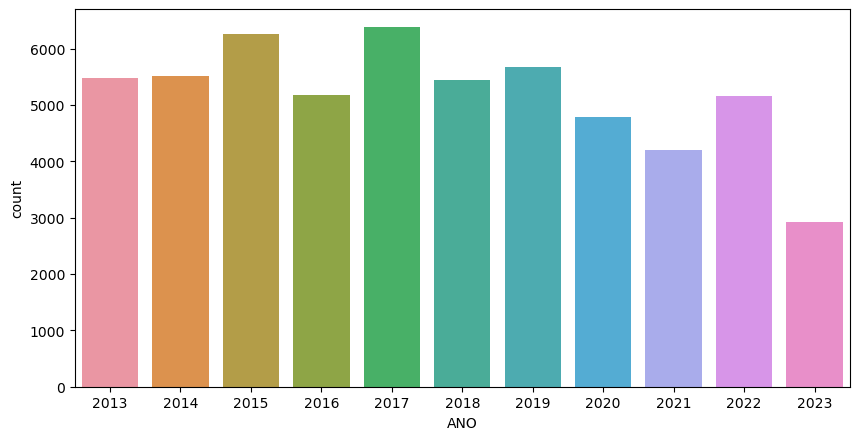

In [43]:
fig = plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(df_historico["ANO"])
plt.show()

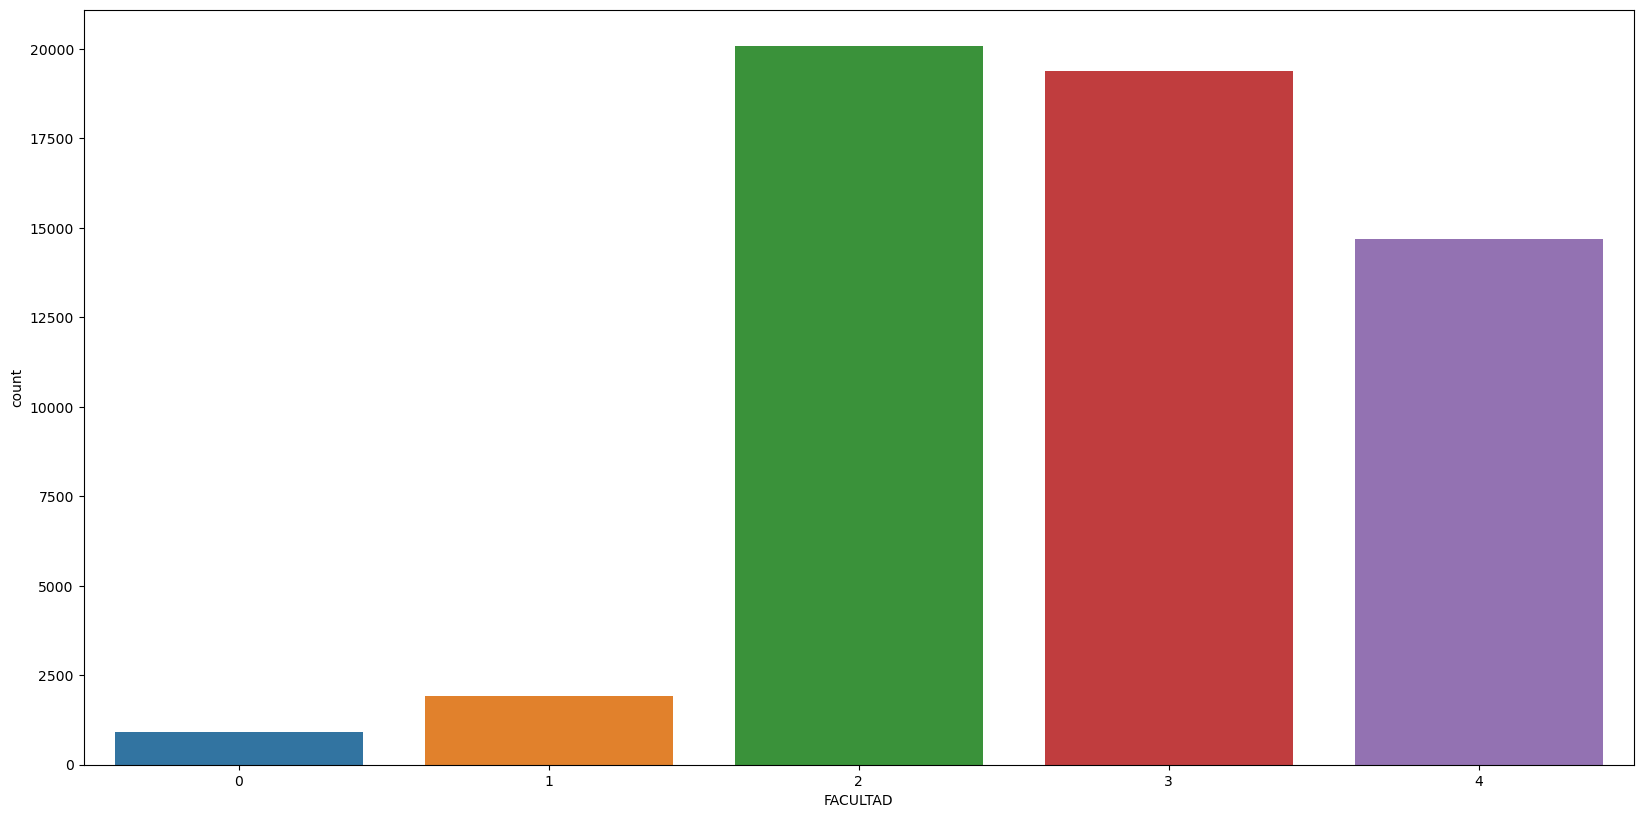

In [44]:
fig = plt.figure(figsize=(20, 10), dpi=100)
sns.countplot(df_historico["FACULTAD"])
plt.show()

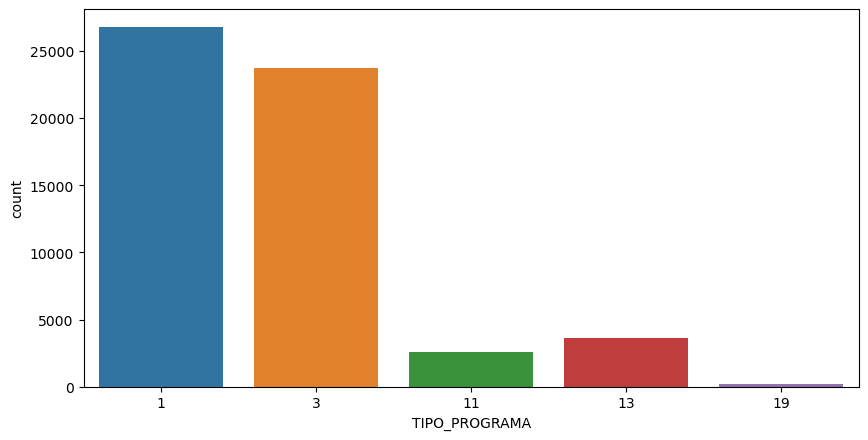

In [45]:
fig = plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(df_historico["TIPO_PROGRAMA"])
plt.show()

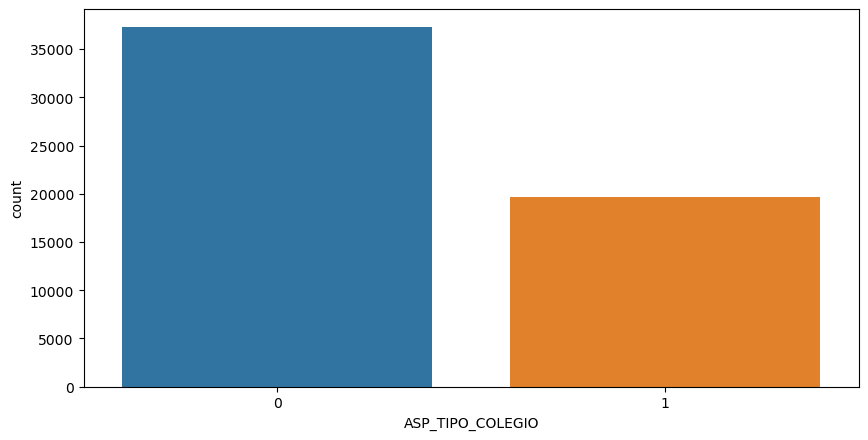

In [46]:
fig = plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(df_historico["ASP_TIPO_COLEGIO"])
plt.show()

In [47]:
df_historico['ASP_ESTRATO'] = df_historico['ASP_ESTRATO'].astype(int)
df_historico['ASP_LUG_NAC'] = df_historico['ASP_LUG_NAC'].astype(int)
df_historico['ASP_LOCALIDAD'] = df_historico['ASP_LOCALIDAD'].astype(int)
df_historico['ASP_DEP_NAC'] = df_historico['ASP_DEP_NAC'].astype(int)
df_historico['PUNTAJE_ICFES'] = df_historico['PUNTAJE_ICFES'].astype(int)
df_historico['EST_VALOR_MATRICULA'] = df_historico['EST_VALOR_MATRICULA'].astype(int)
df_historico['ASP_LOCALIDAD_COLEGIO'] = df_historico['ASP_LOCALIDAD_COLEGIO'].astype(int)
#df_historico['F_FACULTAD DE CIENCIAS MATEMATICAS Y NATURALES'] = df_historico['F_FACULTAD DE CIENCIAS MATEMATICAS Y NATURALES'].astype(int)
#df_historico['F_FACULTAD DE CIENCIAS Y EDUCACION'] = df_historico['F_FACULTAD DE CIENCIAS Y EDUCACION'].astype(int)
#df_historico['F_FACULTAD DE INGENIERIA'] = df_historico['F_FACULTAD DE INGENIERIA'].astype(int)
#df_historico['F_FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLOGICA'] = df_historico['F_FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLOGICA'].astype(int)
#df_historico['F_FACULTAD DEL MEDIO AMBIENTE Y RECURSOS NATURALES'] = df_historico['F_FACULTAD DEL MEDIO AMBIENTE Y RECURSOS NATURALES'].astype(int)

df_actual['ASP_ESTRATO'] = df_actual['ASP_ESTRATO'].astype(int)
df_actual['ASP_LUG_NAC'] = df_actual['ASP_LUG_NAC'].astype(int)
df_actual['ASP_LOCALIDAD'] = df_actual['ASP_LOCALIDAD'].astype(int)
df_actual['ASP_DEP_NAC'] = df_actual['ASP_DEP_NAC'].astype(int)
df_actual['PUNTAJE_ICFES'] = df_actual['PUNTAJE_ICFES'].astype(int)
df_actual['EST_VALOR_MATRICULA'] = df_actual['EST_VALOR_MATRICULA'].astype(int)
df_actual['ASP_LOCALIDAD_COLEGIO'] = df_actual['ASP_LOCALIDAD_COLEGIO'].astype(int)
#df_actual['F_FACULTAD DE CIENCIAS MATEMATICAS Y NATURALES'] = df_actual['F_FACULTAD DE CIENCIAS MATEMATICAS Y NATURALES'].astype(int)
#df_actual['F_FACULTAD DE CIENCIAS Y EDUCACION'] = df_actual['F_FACULTAD DE CIENCIAS Y EDUCACION'].astype(int)
#df_actual['F_FACULTAD DE INGENIERIA'] = df_actual['F_FACULTAD DE INGENIERIA'].astype(int)
#df_actual['F_FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLOGICA'] = df_actual['F_FACULTAD DE TECNOLOGIA - POLITECNICA / TECNOLOGICA'].astype(int)
#df_actual['F_FACULTAD DEL MEDIO AMBIENTE Y RECURSOS NATURALES'] = df_actual['F_FACULTAD DEL MEDIO AMBIENTE Y RECURSOS NATURALES'].astype(int)

### hot encoding

In [ ]:
#df_historico["FACULTAD"] = pd.get_dummies(diff, prefix=['FACULTAD'])
#df_actual["FACULTAD"] = pd.get_dummies(diff, prefix=['FACULTAD'])

df_historico = pd.get_dummies(df_historico, columns=['FACULTAD'])
df_historico = pd.get_dummies(df_historico, columns=['TIPOI'])
df_historico = pd.get_dummies(df_historico, columns=['CARRERA'])
df_historico = pd.get_dummies(df_historico, columns=['TIPO_PROGRAMA'])
df_historico = pd.get_dummies(df_historico, columns=['ASP_LOCALIDAD'])

df_actual = pd.get_dummies(df_actual, columns=['FACULTAD'])
df_actual = pd.get_dummies(df_actual, columns=['TIPOI'])
df_actual = pd.get_dummies(df_actual, columns=['CARRERA'])
df_actual = pd.get_dummies(df_actual, columns=['TIPO_PROGRAMA'])
df_actual = pd.get_dummies(df_actual, columns=['ASP_LOCALIDAD'])

#df_historico = df_historico.drop(columns=['FACULTAD'])

In [48]:
df_historico.nunique()

EST_COD                  37836
ASP_SEXO                     2
ASP_ESTRATO                  6
ASP_FECHA_NAC             6121
ASP_LUG_NAC                670
TIPO_COD                    12
TIPOI                       12
PUNTAJE_ICFES              358
EST_VALOR_MATRICULA       5065
CRA_COD                     68
CARRERA                     24
ASI_COD                     16
NOTA                        51
ANO                         11
PER                          3
FACULTAD                     5
TIPO_PROGRAMA                5
ASP_LOCALIDAD               23
ASP_DEP_NAC                 35
ASP_SNP                  36610
ASP_TIPO_COLEGIO             2
ASP_LOCALIDAD_COLEGIO       24
ASP_TRABAJA                  2
ANIO_ICFES                  24
EDAD                        43
APRUEBA                      2
fecha_registro              26
dtype: int64

In [49]:
df_historico.sample(5)

,EST_COD,ASP_SEXO,ASP_ESTRATO,ASP_FECHA_NAC,ASP_LUG_NAC,TIPO_COD,TIPOI,PUNTAJE_ICFES,EST_VALOR_MATRICULA,CRA_COD,...,ASP_LOCALIDAD,ASP_DEP_NAC,ASP_SNP,ASP_TIPO_COLEGIO,ASP_LOCALIDAD_COLEGIO,ASP_TRABAJA,ANIO_ICFES,EDAD,APRUEBA,fecha_registro
30227,20151578073,1,3,1996-10-25,11001,1,NORMAL,268,860713,578,...,11,11,AC201422389278,0,11,0,2014,19,0,2015-03-01
13903,20222007104,0,3,2004-07-17,11001,1,NORMAL,283,2394240,7,...,11,11,AC202144444188,1,11,0,2021,18,1,2022-09-01
21251,20222020077,1,2,2004-06-28,73001,1,NORMAL,360,464000,20,...,7,73,AC202210812230,1,7,0,2022,18,0,2022-09-01
28255,20231180027,0,2,2006-03-24,25754,1,NORMAL,349,150800,180,...,26,25,AC202242300762,1,26,0,2022,17,1,2023-03-01
15255,20132185237,0,3,1995-06-30,11001,1,NORMAL,370,101559,185,...,11,11,AC201310180661,1,11,0,2013,19,1,2014-09-01


In [50]:
train_dropped_df = df_historico.drop([
'EST_COD', 
#'ASP_SEXO', 
#'ASP_ESTRATO', #5103 
'ASP_FECHA_NAC', 
'ASP_LUG_NAC', 
#'TIPO_COD', #5079
'TIPOI', 
#'PUNTAJE_ICFES', #5142 con datos escalados 5004 sin datos escalados, 5016 con valores escalados 
'EST_VALOR_MATRICULA', #5004 sin valores escalados, 5016 con valores escalados 
'CRA_COD', 
#'CARRERA',#5055 no se escala, no es un valor ordinal 
'ASI_COD', 
'NOTA', 
#'ANO', 
#'PER', #5091
#'FACULTAD', #5055 no se escala, no es un valor ordinal 
#'TIPO_PROGRAMA', #5272
#'ASP_LOCALIDAD',#5075
'ASP_DEP_NAC', 
'ASP_SNP', 
#'ASP_TIPO_COLEGIO', #5125
'ASP_LOCALIDAD_COLEGIO', 
#'ASP_TRABAJA', #5055
'ANIO_ICFES', 
#'EDAD', #5218
#'APRUEBA', 
'fecha_registro'
],axis=1)


In [51]:
train_dropped_df.sample(5)

,ASP_SEXO,ASP_ESTRATO,TIPO_COD,PUNTAJE_ICFES,CARRERA,ANO,PER,FACULTAD,TIPO_PROGRAMA,ASP_LOCALIDAD,ASP_TIPO_COLEGIO,ASP_TRABAJA,EDAD,APRUEBA
32232,1,2,1,294,15,2018,1,3,3,8,0,0,19,1
24749,1,3,1,370,2,2017,3,4,1,10,1,0,18,1
662,1,2,1,424,11,2014,1,1,11,19,1,0,19,0
20694,1,3,32,284,2,2022,3,4,1,10,0,0,17,0
50876,1,2,1,397,16,2014,1,3,3,4,0,0,20,0


In [52]:
train_dropped_df = train_dropped_df.astype('int')
train_dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56982 entries, 0 to 56981
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ASP_SEXO          56982 non-null  int64
 1   ASP_ESTRATO       56982 non-null  int64
 2   TIPO_COD          56982 non-null  int64
 3   PUNTAJE_ICFES     56982 non-null  int64
 4   CARRERA           56982 non-null  int64
 5   ANO               56982 non-null  int64
 6   PER               56982 non-null  int64
 7   FACULTAD          56982 non-null  int64
 8   TIPO_PROGRAMA     56982 non-null  int64
 9   ASP_LOCALIDAD     56982 non-null  int64
 10  ASP_TIPO_COLEGIO  56982 non-null  int64
 11  ASP_TRABAJA       56982 non-null  int64
 12  EDAD              56982 non-null  int64
 13  APRUEBA           56982 non-null  int64
dtypes: int64(14)
memory usage: 6.1 MB


<AxesSubplot:title={'center':'Pearson - correlacion de caracteristicas'}>

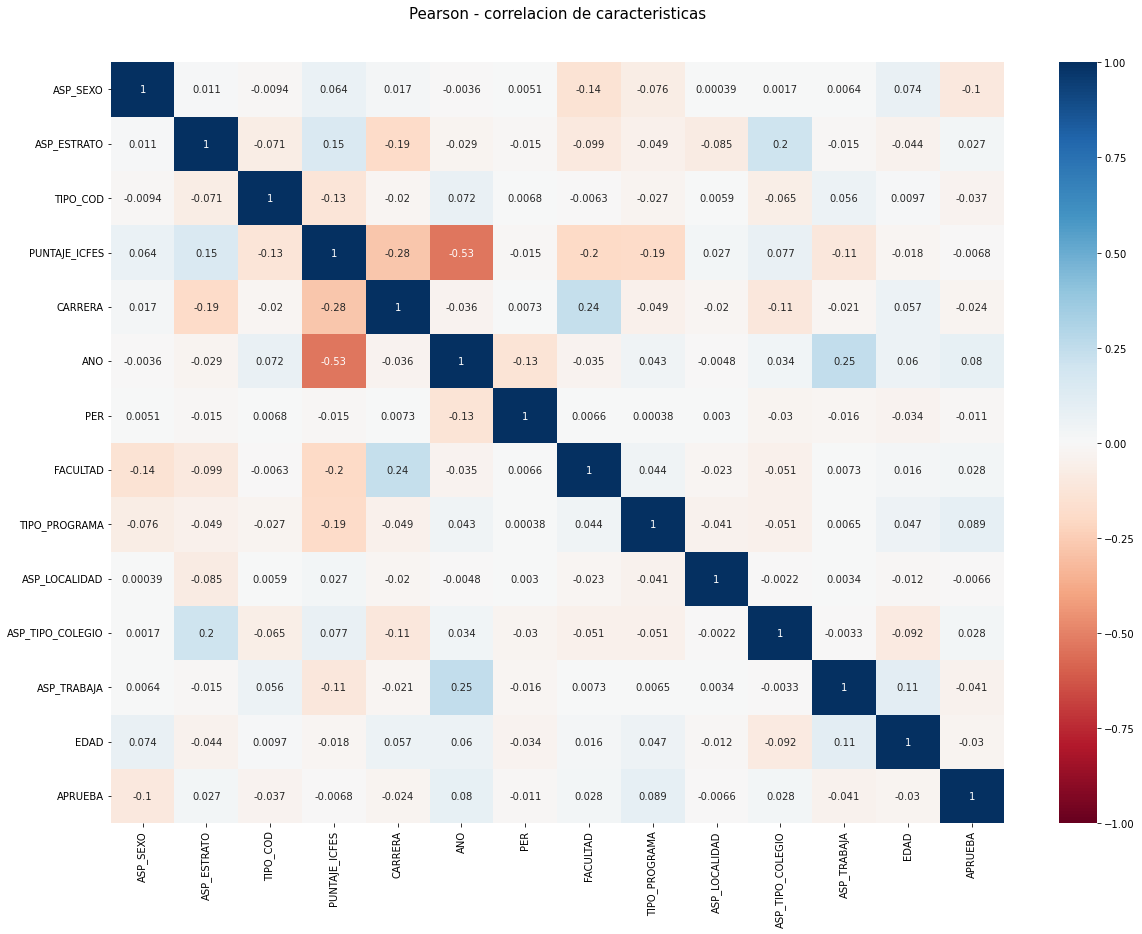

In [53]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,14))
plt.title('Pearson - correlacion de caracteristicas', y=1.05, size=15)
sns.heatmap(train_dropped_df.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)

In [54]:
train_dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56982 entries, 0 to 56981
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ASP_SEXO          56982 non-null  int64
 1   ASP_ESTRATO       56982 non-null  int64
 2   TIPO_COD          56982 non-null  int64
 3   PUNTAJE_ICFES     56982 non-null  int64
 4   CARRERA           56982 non-null  int64
 5   ANO               56982 non-null  int64
 6   PER               56982 non-null  int64
 7   FACULTAD          56982 non-null  int64
 8   TIPO_PROGRAMA     56982 non-null  int64
 9   ASP_LOCALIDAD     56982 non-null  int64
 10  ASP_TIPO_COLEGIO  56982 non-null  int64
 11  ASP_TRABAJA       56982 non-null  int64
 12  EDAD              56982 non-null  int64
 13  APRUEBA           56982 non-null  int64
dtypes: int64(14)
memory usage: 6.1 MB


In [55]:
train_dropped_df.isnull().sum()

ASP_SEXO            0
ASP_ESTRATO         0
TIPO_COD            0
PUNTAJE_ICFES       0
CARRERA             0
ANO                 0
PER                 0
FACULTAD            0
TIPO_PROGRAMA       0
ASP_LOCALIDAD       0
ASP_TIPO_COLEGIO    0
ASP_TRABAJA         0
EDAD                0
APRUEBA             0
dtype: int64

In [56]:
#scaler = StandardScaler()

#seleccionando vector de caracteristicas y variable objetivo

X = train_dropped_df.drop(['APRUEBA'], axis=1)

y = train_dropped_df['APRUEBA']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [58]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [59]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [60]:
df_historico['predicho'] = logreg.predict(X)

y_pred

array([1, 0, 0, ..., 0, 0, 0])


### Métricas de clasificación binaria:
#### Exactitud: 

- Mide la corrección general del modelo.
- Fórmula: (TP + TN) / (TP + TN + FP + FN)

In [61]:
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.5717


#### Precisión:

- Mide la fracción de instancias relevantes entre las instancias recuperadas.
- Fórmula: TP / (TP + FP)

In [62]:
from sklearn.metrics import precision_score

In [63]:
print('Logistic Regression precision score with all the features: {0:0.4f}'. format(precision_score(y_test, y_pred)))

Logistic Regression precision score with all the features: 0.5770


#### Recuperación (sensibilidad o tasa de verdaderos positivos):

- Mide la fracción de instancias relevantes que se han recuperado sobre la cantidad total de instancias relevantes.
- Fórmula: TP / (TP + FN)

In [64]:
from sklearn.metrics import recall_score
print('Logistic Regression recall score with all the features: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Logistic Regression recall score with all the features: 0.5403


#### Puntuación F1:

- Combina precisión y recuperación en una sola métrica, proporcionando un equilibrio entre los dos.
- Fórmula: 2 * (Precisión * Recuperación) / (Precisión + Recuperación)

In [65]:
from sklearn.metrics import f1_score
print('Logistic Regression f1_score score with all the features: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Logistic Regression f1_score score with all the features: 0.5580


#### Área bajo la curva característica operativa del receptor (AUC-ROC):

- Evalúa la capacidad del modelo para distinguir entre clases positivas y negativas.
- Los valores de AUC-ROC varían de 0 a 1, y los valores más altos indican un mejor rendimiento.

In [66]:
from sklearn.metrics import roc_auc_score
print('Logistic Regression auc_roc score with all the features: {0:0.4f}'. format(roc_auc_score(y_test, y_pred)))

Logistic Regression auc_roc score with all the features: 0.5718


### Métricas de clasificación multiclase:
#### Precisión multiclase:

- Mide la corrección general del modelo para problemas multiclase.
- Fórmula: (Número de instancias clasificadas correctamente) / (Número total de instancias)

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Logistic Regression precision_macro score with all the features: {0:0.4f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Logistic Regression recall_macro score with all the features: {0:0.4f}'. format(recall_score(y_test, y_pred, average='macro')))
print('Logistic Regression f1_macro score with all the features: {0:0.4f}'. format(f1_score(y_test, y_pred, average='macro')))

Logistic Regression precision_macro score with all the features: 0.5721
Logistic Regression recall_macro score with all the features: 0.5718
Logistic Regression f1_macro score with all the features: 0.5713


#### Precisión micropromediada, recuperación y puntuación F1:

Estas métricas agregan las contribuciones de todas las clases y luego calculan la precisión, la recuperación y la F1.

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Logistic Regression precision_micro score with all the features: {0:0.4f}'. format(recall_score(y_test, y_pred, average='micro')))
print('Logistic Regression recall_micro score with all the features: {0:0.4f}'. format(recall_score(y_test, y_pred, average='micro')))
print('Logistic Regression f1_micro score with all the features: {0:0.4f}'. format(recall_score(y_test, y_pred, average='micro')))

Logistic Regression precision_micro score with all the features: 0.5717
Logistic Regression recall_micro score with all the features: 0.5717
Logistic Regression f1_micro score with all the features: 0.5717


In [69]:

cm = confusion_matrix(y_test, y_pred)

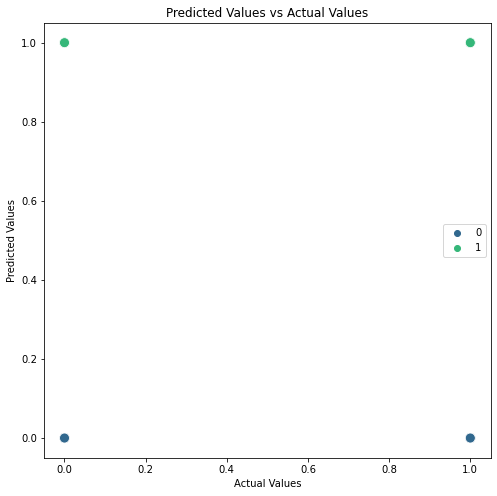

In [70]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, hue=y_pred, marker='o', s=100, palette='viridis')
plt.title('Predicted Values vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Este diagrama de dispersión mostrará puntos donde el eje x representa los valores reales ( y_test), el eje y representa los valores predichos ( y_pred) y diferentes marcadores/colores indican diferentes clases predichas.

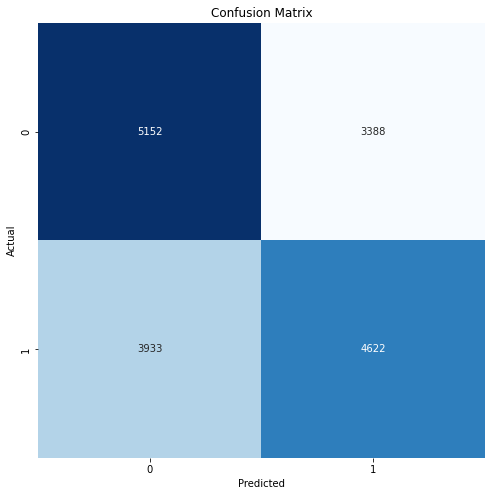

In [71]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

En esta matriz de confusión, las filas representan las clases reales y las columnas representan las clases predichas. Los elementos diagonales representan predicciones correctas, mientras que los elementos fuera de la diagonal representan clasificaciones erróneas.

### Agregamos una colummna nueva con los valores predichos 

In [73]:
df_historico['APRUEBA'].value_counts()

1    28532
0    28450
Name: APRUEBA, dtype: int64

In [74]:
#5717 con estandarizacion
#5483 sin estandarizacion

In [75]:
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.1441513 , 0.11011909, 0.09164794, 0.08339309, 0.08238044,
       0.07729156, 0.0750737 , 0.07416073, 0.06575746, 0.06047459,
       0.05766021, 0.05266611, 0.02522376])

In [76]:


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 11


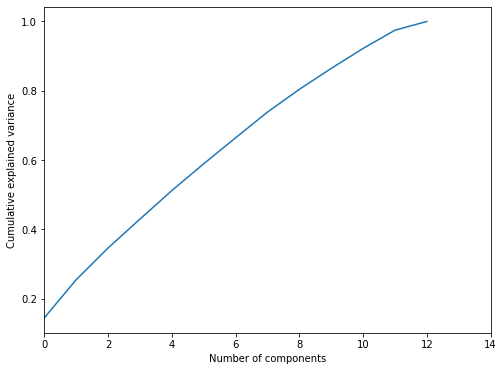

In [77]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()